In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook  # Make nice loading bars
from scipy import ndimage
%matplotlib inline

# K-means Clustering

### Toy dataset

In [2]:
N_classes = 4
classes = []
for i in range(N_classes):
    mean = np.random.randint(-10, 10, size=[2])
    sigma = np.random.uniform(0.1, 2)
    class_i = np.random.normal(mean, sigma, [100, 2])
    classes.append(class_i)
    
    print(mean, sigma)

[-7  5] 1.543958001142433
[ -8 -10] 0.8977392398797638
[-1  2] 0.8744854445235378
[ 6 -4] 1.860823765447184


In [3]:
toy_data = np.concatenate(classes, axis=0)

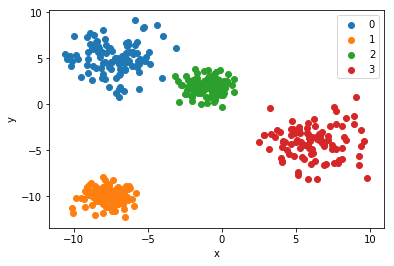

In [4]:
for i, c in enumerate(classes):
    plt.scatter(c[:, 0], c[:, 1], label='{}'.format(i))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Nearest Neighbour function

Find the datapoints that belong to each centroid.

In [5]:
def find_nn(X, M):
    # cluster_info hold the information which datapoint belongs to which centroid
    cluster_info = np.zeros([len(X)])
    dist = np.zeros([len(X)])
    
    # Iterate over datapoints
    for i, x in enumerate(X):
        d_min = np.inf
        k = -1
        # Iterate over centroids and assign datapoint to cetroid that is closest
        for j, m in enumerate(M):
            d = np.sqrt(np.sum(np.abs(x - m)**2))
            if d < d_min:
                d_min = d
                k = j
        cluster_info[i] = k
        dist[i] = d_min
    return cluster_info, dist

### Update function
Returns the new means based on the available cluster information.

In [6]:
def update_means(M, X, cluster):
    new_M = []
    for i, m in enumerate(M):
        cluster_i = X[cluster == i]
        
        # Only update if it is possible to calculate
        if not len(cluster_i) == 0:
            mean = np.mean(cluster_i, 0)
            new_M.append(mean)
        else:
            # Do no update and use old value
            new_M.append(M[i])
    return np.array(new_M)

Testing both update and NN function:

In [7]:
means_init = np.array([[1,1], [12,12]])
cluster, distances = find_nn(toy_data, means_init)
mean_update = update_means(means_init, toy_data, cluster)
print(mean_update)

[[ -2.47407597  -1.77681326]
 [ 12.          12.        ]]


### Plotting function
Shows the final clustering and the movement of the centroids, as well as the cost as size of the markers.

In [8]:
def plot_hist(k, data, cluster, m_hist, c_hist):
    figure, axes = plt.subplots(1,1)
    for i in range(k):
        cluster1 = data[cluster == i]
        axes.scatter(cluster1[:, 0], cluster1[:, 1], label='{}'.format(i))
        axes.plot(m_hist[:, i, 0], m_hist[:, i, 1], '--', color='k')
       # for j, c in enumerate(c_hist):
        #    axes.plot(m_hist[j, i, 0], m_hist[j, i, 1], 'o', color='k', ms=c)

    axes.legend()
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_aspect(1)
    axes.set_title('k={}, cost={}'.format(k, c_hist[-1]))

### K- Means algorithm
Combines NN and unpdate function.

In [9]:
def k_means(data, k=2, max_iter=10, show_loading_bar=True):
    N_dim = data.shape[-1]  # Entries in each data point (for colors: 3, toy dataset 2) 
    
    # Initialize centroids by samping at random from a uniform distribution bounded
    # by the min and max values in each data dimension.
    # Find the bounds:
    mins = []
    maxs = []
    for i in range(N_dim):
        min_range, max_range = data[..., i].min(), data[..., i].max() 
        mins.append(min_range)
        maxs.append(max_range)
    # Sample random initial centroids
    mean = np.random.uniform(mins, maxs, size=[k, N_dim])    
    means = [mean]
    costs = []
    
    # Now iterate until max_iter and update centroids
    # tnrange is the same as range, only that it also makes a nice loading bar
    iterator = tnrange if show_loading_bar else range
    for i in iterator(max_iter):
        cluster, dist = find_nn(data, mean)
        cost = 0
        for j in range(k):
            cost_j = np.sum(dist[cluster == j])
            cost += cost_j if np.isfinite(cost_j) else 0
        costs.append(cost)
        mean = update_means(mean, data, cluster)
        means.append(mean)        
    means = np.array(means)
    costs = np.array(costs)

    return mean, cost, cluster, means, costs

### Playing around with k-means

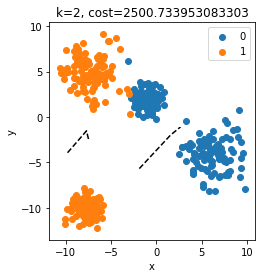

In [10]:
k = 2
mean_final, cost_final, cluster, mean_hist, cost_hist = k_means(toy_data, k, max_iter=15)
plot_hist(k, toy_data, cluster, mean_hist, cost_hist)

### Plotting cost versus k

In [11]:
def numerate(list):
    endlist = []
    tmp = []
    for i,o in enumerate(list,1):
        tmp = i,o
        endlist.append(tmp)
    endlist= np.array(endlist)
    return endlist      

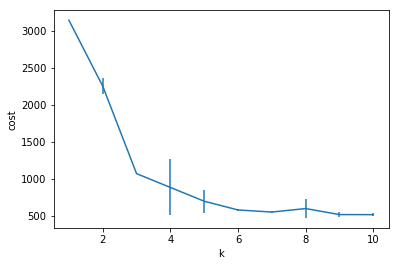

In [12]:
k_max = 11
ks = range(1, 11) 
N_mean = 10

costs = []
costsmean = []
for k in tnrange(1, k_max):
    cost_means = []
    for i in range(N_mean):
        means, cost, cluster, m_h, c_h = k_means(toy_data, k, show_loading_bar=False)
        cost_means += [cost]
    cost_mean = np.mean(cost_means)
    cost_err = np.std(cost_means)
    costsmean.append(cost_mean)
    costs.append([cost_mean, cost_err])
costs = np.array(costs)
costsmean = np.array(costsmean)
ddd = numerate(costsmean)

plt.errorbar(ks, costs[:, 0], yerr=costs[:, 1])
plt.xlabel('k')
plt.ylabel('cost')

## Find the best K
The highest change in derivative

In [13]:
def Steigung(p1,p2):
    np.array(p1)
    np.array(p2)
    '''
    np.insert(p1,0,0)
    np.insert(p2,0,1)
    print(p1)'''
    diff = np.abs(np.subtract(p2,p1))
    m = diff[1]/diff[0]
    return m

In [14]:
def Elbow(Points):
    hratio = -1
    ratio_tmp = -2
    index = -3
    for i,p in enumerate(Points):
        if i>0:
            mVor = Steigung(Points[i-1],p)
            
            if i < len(Points)-1:
                mNach = Steigung(p,Points[i+1])
                ratio_tmp =mVor/mNach
                if ratio_tmp > hratio:
                    hratio = ratio_tmp
                    index = i
    return index
                

In [15]:
def FindBestK(data, k_max = 11 , N_mean = 10):
    costs = []
    costsmean = []
    for k in tnrange(1, k_max):
        cost_means = []
        
        for i in range(N_mean):
            means, cost, cluster, m_h, c_h = k_means(data, k, show_loading_bar=False)
            cost_means += [cost]
        cost_mean = np.mean(cost_means)
        costs.append([cost_mean])
        costsmean.append(cost_mean)
        costs.append([cost_mean, cost_err])
    costs = np.array(costs)
    costsmean = np.array(costsmean)
    ddd = numerate(costsmean)
    bestK = Elbow(ddd)+1
    
    means, cost, cluster, m_h, c_h= k_means(data,bestK,max_iter=15)
    return bestK ,means,cost, cluster

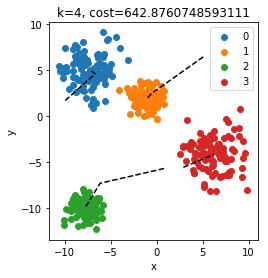

In [16]:
k = N_classes
means, cost, cluster, m_h, c_h = k_means(toy_data, k=k, max_iter=30)
plot_hist(k, toy_data, cluster, m_h, c_h)

# Image compression

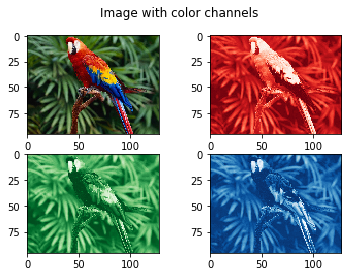

In [17]:
from PIL import Image
img = Image.open('ara_macao.jpg')
img = img.resize((256*5,192*5),3)
img.save('ara_m2.jpg')
image = plt.imread('ara_m2.jpg')[::10, ::10, :]
image = np.array(image) / 255.  # Normalize to [0, 1] for easier usability
size_x, size_y = image.shape[:2]  # Remember size of image for later
image_flat = np.reshape(image, [-1, 3])  # Make the image to a long list of color vectors

R, G, B = image_flat[..., 0], image_flat[..., 1], image_flat[..., 2]  # Get each set of colors

fig, AX = plt.subplots(2,2)
ax1, ax2, ax3, ax4 = np.reshape(AX, [-1])
ax1.imshow(image)
ax2.imshow(np.reshape(R, [size_x, size_y]), 'Reds_r')
ax3.imshow(np.reshape(G, [size_x, size_y]), 'Greens_r')
ax4.imshow(np.reshape(B, [size_x, size_y]), 'Blues_r')
fig.suptitle('Image with color channels')

Images can be viewed as a set of 3 element vectors:

\begin{align}
    I &= \left\{c_i = [r_i, g_i, b_i]\right\} \quad \forall i \in [1, \ldots, \#I]
\end{align}

$I$ is the image that consists of color values $c_i$ that each contain 3 values $r, g, b$ for red, green and blue. In total there are $\#I$ many points in the image.

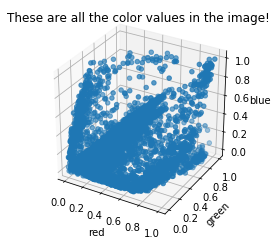

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B)
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_title('These are all the color values in the image!')
ax.set_aspect(1)

Lets cluster!

In [19]:
means, cost, cluster, m_h, c_h = k_means(image_flat, 10, max_iter=10)

Now make a new image and assign each pixel the value of the centroid corresponding to this pixel.

In [20]:
image_flat_new = np.zeros(image_flat.shape)  # Empty array, where the new colors can be written in
for i, m in enumerate(means):
    image_flat_new[cluster == i] = m  # Assing the color
image_compr = np.reshape(image_flat_new, [size_x, size_y, 3])

When plotting the image one can see, that the clustering did a pretty good job!

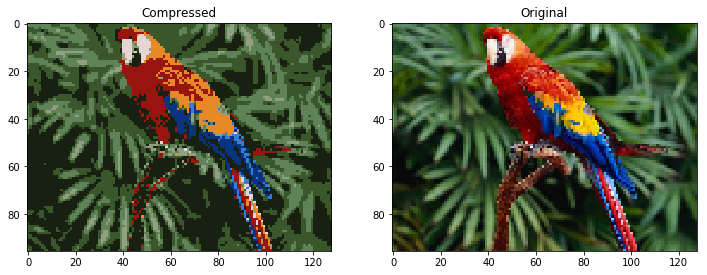

In [21]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=[12,6])
ax1.imshow(image_compr)
ax1.set_title('Compressed')
ax2.imshow(image)
ax2.set_title('Original')

And of course we can again have a look at the point cloud. Here we color each color value in the image with the color of the corresponding centroid.

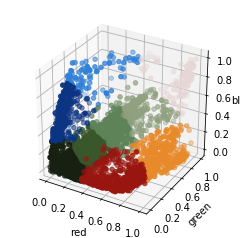

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for k, mean in enumerate(means):
    R, G, B = np.split(image_flat[cluster == k], 3, axis=-1)
    ax.scatter(R, G, B, color=mean)
ax.set_xlabel('red')
ax.set_ylabel('green')
ax.set_zlabel('blue')
ax.set_aspect(1)